<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/seminar_4_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Generate data with meadian less than mean. Think about skewed data. 
2.   Generate more or less uniform set of points and calculate mean and median. Add one outlier. Calculate mean and median again. Draw conclusion how do outliers influence these estimators.
3.   Find $\mu_{MLE}$ and $\sigma_{MLE}$ for the normaly distributed iids.
4.   Why $IQR(sample)$ is always less than $Range(sample)$?




#Types of data

**Problem:**

Give an examlpe for each of the following types of data (consult lecture notes if needed)

* Nominal
* Ordinal
* Interval
* Ratio

Think which operations are possible on each of this types (consider table from lecture notes if needed).
Think what ambiguity cares applying "unsupport" operations on data, try coming up with about some neat example.


#Population and sample

**Problem:**

Complete the following function to generate random population of zeros and ones that contains given number of zeros.

In [2]:
import numpy as np
np.random.seed(0)

def generate_population(num_zeros, num_ones):
  population = np.hstack([np.ones(num_ones), np.zeros(num_zeros)])
  np.random.shuffle(population)
  return population

print(generate_population(3, 2))

[0. 1. 1. 0. 0.]


**Problem:**

Complete the following function that should generate all possible samples from given population (with replacement!).
Do not use populations larger than 5 for testing (*subproblem:* think why).

In [13]:
import numpy as np
import itertools

def generate_samples(population, elems_in_sample):
  return np.array(list(itertools.product(population, repeat=elems_in_sample)))


test_arr = np.array([1, 0, 1])
samples = generate_samples(test_arr, 2)
print(samples)

[[1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]]


**Problem:**

Complete the following function that should calculate percentage of ones in a given array of zeros and ones.

In [15]:
import numpy as np

def percentage_of_ones(array):
  return np.sum(array, axis = 1)/array.shape[1]

test_array = np.array([[1, 1], [1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [1, 1], [1, 0], [1, 1]])
print(percentage_of_ones(test_array))

[1.  0.5 1.  0.5 0.  0.5 1.  0.5 1. ]


**Problem:**

Complete the following function that should draw histogram of the given array.
Be sure, that calling function twice leads to two histograms on one plot, not two separate plots.

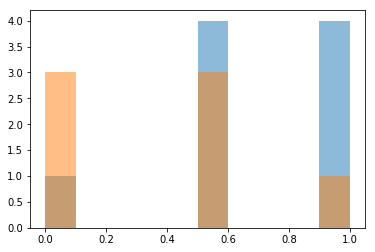

In [28]:
import matplotlib.pyplot as plt

def draw_histogram(array):
  plt.hist(array, alpha=0.5);

draw_histogram(np.array([1., 0.5,1., 0.5, 0., 0.5, 1., 0.5, 1.]))
draw_histogram(np.array([0.5, 1., 0.5, 0., 0., 0., 0.5]))

In [29]:
from scipy.stats import bernoulli, binom, poisson
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

# Properties for plots
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])


def generate_population(num_zeros, num_ones):
  population = np.hstack([np.ones(num_ones), np.zeros(num_zeros)])
  np.random.shuffle(population)
  return population

def generate_samples(population, elems_in_sample):
  return np.array(list(itertools.product(population, repeat=elems_in_sample)))

def percentage_of_ones(array):
  return np.sum(array, axis = 1)/array.shape[1]

def draw_histogram(array):
  plt.hist(array, alpha=0.5);

@widgets.interact(population_size=(1,5), sample_size=(1, 5), continuous_update=False)
def plot_histos(population_size, sample_size):
  population = generate_population(population_size)
  samples = generate_samples(population, sample_size)
  population_percentage = percentage_of_ones(population)
  samples_percentage = percentage_of_ones(samples)
  draw_histogram(population_percentage)
  draw_histogram(samples_percentage)

interactive(children=(IntSlider(value=3, description='population_size', max=5, min=1), IntSlider(value=3, desc…

In [1]:
%%html
<span style="color:blue">some *blue* text</span>.